## Scraping

In [80]:
import os

os.environ["BOT_TOKEN"] = "Xyz"

bot_token = os.getenv("BOT_TOKEN")
print(bot_token)  # Verify the token (optional)


Xyz


In [81]:
# Create a .env file in the Colab environment
env_content = """
TELEGRAM_API_ID= 21606669
TELEGRAM_API_HASH=3e6d4f62d3d8559c8e0f2da918ce8b0e
TELEGRAM_PHONE= +917906372697
"""

with open(".env", "w") as env_file:
    env_file.write(env_content)

print(".env file created successfully!")

# 2nd Method

"""!echo "TELEGRAM_API_ID=21606669" > .env
!echo "TELEGRAM_API_HASH=XXXX" >> .env
!echo "TELEGRAM_PHONE=XXXXXX" >> .env
print(".env file created successfully.")"""



.env file created successfully!


'!echo "TELEGRAM_API_ID=21606669" > .env\n!echo "TELEGRAM_API_HASH=XXXX" >> .env\n!echo "TELEGRAM_PHONE=XXXXXX" >> .env\nprint(".env file created successfully.")'

In [82]:
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Check if the environment variables are loaded properly
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

print(API_ID, API_HASH, phone_number)  # This will print the values to verify they are loaded correctly


21606669 3e6d4f62d3d8559c8e0f2da918ce8b0e +917906372697


In [134]:
from telethon import TelegramClient

# Initialize TelegramClient
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to start the client with phone number
async def start_client():
    await client.start(phone_number)  # Start the client with the phone number for authentication
    print("Client started successfully.")

# Run the authentication process
await start_client()

OperationalError: database is locked

In [85]:
from telethon import TelegramClient
from dotenv import load_dotenv
import os
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Fetch API credentials and phone number from environment variables
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

In [86]:
# # Ensure session file is removed to avoid locking issues

"""session_file = 'custom_session_name.session'
if os.path.exists(session_file):
    os.remove(session_file)"""

import uuid
session_file = f"session_{uuid.uuid4().hex}.session"

client = TelegramClient(session_file, API_ID, API_HASH)

# Initialize TelegramClient with a custom session file
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to scrape messages asynchronously
async def scrape_telegram(channel_name, limit=100):
    messages = []
    try:
        # Start the client with phone number authentication
        await client.start(phone_number)

        # Fetch messages asynchronously inside the async context
        print(f"Attempting to scrape messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:  # Only include text messages
                messages.append({'Message': message.text, 'Date': message.date})

        # Check if messages were retrieved
        if not messages:
            print("No messages were retrieved. Please check the channel permissions and name.")
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(messages)

# Main execution block
async def main():
    channel_name = '@stock_share_market_predictions'  # Updated channel name
    print("Starting scraping...")
    data = await scrape_telegram(channel_name, limit=10)  # Scrape last 10 messages for debugging
    print("Scraping completed!")

    # Save data to CSV
    if not data.empty:
        data.to_csv('telegram_messages.csv', index=False, encoding='utf-8')
        print("Data saved to telegram_messages.csv")
    else:
        print("No data to save.")

    # Download the file if in Google Colab
    """from google.colab import files
    files.download("telegram_messages.csv")"""

# Run the asynchronous main function in a cell that allows async execution
import nest_asyncio
nest_asyncio.apply()

# Run the async main function
await main()


Starting scraping...
Error: database is locked
Scraping completed!
No data to save.


In [87]:
import re
import pandas as pd
from telethon.sync import TelegramClient
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
PHONE_NUMBER = os.getenv("TELEGRAM_PHONE")  # For logging in if using user account

In [88]:
# Initialize the Telegram Client
client = TelegramClient('session_name', API_ID, API_HASH)

# Function to scrape stock-related messages from a channel
def scrape_stock_data(channel_handle, limit=100):
    stock_keywords = ['nifty', 'banknifty', 'call', 'option', 'buy', 'sell', 'market', 'stock', 'target', 'alert']
    stock_data = []

    try:
        # Login if required
        if not client.is_user_authorized():
            client.connect()
            client.send_code_request(PHONE_NUMBER)
            client.sign_in(PHONE_NUMBER)

        for message in client.iter_messages(channel_handle, limit=limit):
            if message.text:
                # Check if message contains any of the stock-related keywords
                if any(keyword in message.text.lower() for keyword in stock_keywords):
                    # Extract relevant information from the message (for example, stock price or trends)
                    stock_data.append({
                        'Message': message.text,
                        'Date': message.date
                    })
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(stock_data)

# Specify the target channel (use the @ handle of the channel)
channel_handle = '@StocksnOptionsTrading'  # Replace with the actual channel @ handle

# Start scraping for stock data
print("Starting scraping for stock data...")
data = scrape_stock_data(channel_handle, limit=100)
print("Scraping completed!")

# Save the data to CSV
if not data.empty:
    data.to_csv('intraday_banknifty_calls_data.csv', index=False)
    print("Stock data saved to intraday_banknifty_calls_data.csv")
else:
    print("No relevant stock data found.")

# Disconnect the client
client.disconnect()


Starting scraping for stock data...
Error: You must use "async for" if the event loop is running (i.e. you are inside an "async def")
Scraping completed!
No relevant stock data found.


C:\Users\Karan Shukla\AppData\Local\Temp\ipykernel_16388\1147220030.py:11: RuntimeWarning: coroutine 'UserMethods.is_user_authorized' was never awaited
  if not client.is_user_authorized():


<Future pending cb=[shield.<locals>._outer_done_callback() at c:\Users\Karan Shukla\AppData\Local\Programs\Python\Python312\Lib\asyncio\tasks.py:922]>

In [89]:
from telethon import TelegramClient
from dotenv import load_dotenv
import os
import pandas as pd

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")  # Your phone number with country code

# Ensure session file is removed to avoid locking issues
import uuid
session_file = f"session_{uuid.uuid4().hex}.session"

client = TelegramClient(session_file, API_ID, API_HASH)

# Initialize TelegramClient with a custom session file
client = TelegramClient('custom_session_name', API_ID, API_HASH)

# Function to scrape messages asynchronously
async def scrape_telegram(channel_name, limit=100):
    messages = []
    try:
        # Start the client with phone number authentication
        await client.start(phone_number)

        # Fetch messages asynchronously inside the async context
        print(f"Attempting to scrape messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:  # Only include text messages
                messages.append({'Message': message.text, 'Date': message.date})

        # Check if messages were retrieved
        if not messages:
            print("No messages were retrieved. Please check the channel permissions and name.")
    except Exception as e:
        print(f"Error: {e}")

    return pd.DataFrame(messages)

# Main execution block
async def main():
    channel_name = '@stock_share_market_predictions'  # Correct channel name
    print("Starting scraping...")
    data = await scrape_telegram(channel_name, limit=10)  # Scrape last 10 messages for debugging
    print("Scraping completed!")

    # Save data to CSV
    if not data.empty:
        data.to_csv('telegram_messages.csv', index=False, encoding='utf-8')
        print("Data saved to telegram_messages.csv")
    else:
        print("No data to save.")

    # Download the file (if in Google Colab)
    """from google.colab import files
    files.download("telegram_messages.csv")"""

# Run the asynchronous main function
await main()


Starting scraping...
Error: database is locked
Scraping completed!
No data to save.


In [90]:
import re
from telethon import TelegramClient
import pandas as pd
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID"))
API_HASH = os.getenv("TELEGRAM_API_HASH")
phone_number = os.getenv("TELEGRAM_PHONE")

# Initialize the Telegram Client
client = TelegramClient('stock_market_session', API_ID, API_HASH)

# Function to clean and filter messages
def preprocess_message(text):
    """
    Preprocesses the message text by removing special characters, emojis,
    and filtering based on relevant stock market keywords.
    """
    # Remove emojis and special characters
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Remove extra spaces

    # Define stock-related keywords
    keywords = ['sensex', 'nifty', 'stock', 'market', 'shares', 'price', 'trading', 'buy', 'sell']
    if any(keyword in clean_text.lower() for keyword in keywords):
        return clean_text  # Return message if it matches relevant keywords
    return None  # Ignore non-relevant messages

# Function to scrape Telegram messages
async def scrape_telegram(channel_name, limit=500):
    """
    Scrapes messages from the specified Telegram channel, filters and preprocesses them,
    and returns a DataFrame containing the relevant messages.
    """
    messages = []
    try:
        print(f"Scraping messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:
                filtered_text = preprocess_message(message.text)
                if filtered_text:  # Only include relevant messages
                    messages.append({'Message': filtered_text, 'Date': message.date})
        print(f"Scraped {len(messages)} relevant messages.")
    except Exception as e:
        print(f"Error occurred during scraping: {e}")
    return pd.DataFrame(messages)

# Main asynchronous function
async def main():
    """
    Main function to authenticate the client, scrape the channel, and save the data.
    """
    # Authenticate the Telegram client
    await client.start(phone_number)

    # Define the target channel and scraping limit
    channel_name = '@stock_share_market_predictions'  # Replace with the actual channel name
    data = await scrape_telegram(channel_name, limit=500)  # Adjust limit as needed

    # Disconnect the client after scraping
    await client.disconnect()

    # Save the scraped data to CSV
    if not data.empty:
        data.to_csv('stock_market_data.csv', index=False, encoding='utf-8')
        print("Data saved to 'stock_market_data.csv'")
    else:
        print("No relevant data found to save.")

# Run the script
import asyncio
asyncio.run(main())


Scraping messages from @stock_share_market_predictions...
Scraped 125 relevant messages.
Data saved to 'stock_market_data.csv'


In [91]:
import re
from telethon import TelegramClient
import pandas as pd
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()
API_ID = int(os.getenv("TELEGRAM_API_ID")) 
API_HASH = os.getenv("TELEGRAM_API_HASH") 
phone_number = os.getenv("TELEGRAM_PHONE")  

In [133]:
# Initialize Telegram client
client = TelegramClient('stock_market_session', API_ID, API_HASH)

# Function to clean and filter messages
def preprocess_message(text):
    """
    Preprocesses the message text by removing special characters, emojis,
    and filtering based on relevant stock market keywords.
    """
    # Remove emojis and special characters
    clean_text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Remove extra spaces

    # Define stock-related keywords
    keywords = ['sensex', 'nifty', 'stock', 'market', 'shares', 'price', 'trading', 'buy', 'sell']
    if any(keyword in clean_text.lower() for keyword in keywords):
        return clean_text  # Return message if it matches relevant keywords
    return None  # Ignore non-relevant messages

# Function to scrape Telegram messages
async def scrape_telegram(channel_name, limit=500):
    """
    Scrapes messages from the specified Telegram channel, filters and preprocesses them,
    and returns a DataFrame containing the relevant messages.
    """
    messages = []
    try:
        print(f"Scraping messages from {channel_name}...")
        async for message in client.iter_messages(channel_name, limit=limit):
            if message.text:
                filtered_text = preprocess_message(message.text)
                if filtered_text:  # Only include relevant messages
                    messages.append({'Message': filtered_text, 'Date': message.date})
        print(f"Scraped {len(messages)} relevant messages.")
    except Exception as e:
        print(f"Error occurred during scraping: {e}")
    return pd.DataFrame(messages)

# Main asynchronous function
async def main():
    """
    Main function to authenticate the client, scrape the channel, and save the data.
    """
    # Authenticate the Telegram client
    await client.start(phone_number)

    # Define the target channel and scraping limit
    channel_name = '@stock_share_market_predictions'  # Replace with the actual channel name
    data = await scrape_telegram(channel_name, limit=500)  # Adjust limit as needed

    # Disconnect the client after scraping
    await client.disconnect()

    # Save the scraped data to CSV and download it in Colab
    if not data.empty:
        data.to_csv('FINAL_data.csv', index=False, encoding='utf-8')
        print("Data saved to 'FINAL_data.csv'")
    else:
        print("No relevant data found to save.")

# Run the script
import asyncio
asyncio.run(main())


Scraping messages from @stock_share_market_predictions...
Scraped 125 relevant messages.
Data saved to 'FINAL_data.csv'


# Data Preprocessing

In [93]:
import pandas as pd
import re
from datetime import datetime

# Load your CSV data
data = pd.read_csv('/capX/stock_market_data.csv')

# 1. Clean the 'Message' text by removing special characters and numbers
def clean_message(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert text to lowercase
    return text

# Apply cleaning function
data['Cleaned_Message'] = data['Message'].apply(clean_message)

# 2. Handle missing values
data.dropna(subset=['Message'], inplace=True)  # Drop rows with missing message

# 3. Convert 'Date' column to a consistent datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert to datetime, invalid entries become NaT
data.dropna(subset=['Date'], inplace=True)  # Drop rows with missing Date

# Check the cleaned data
print(data.head())


                                             Message  \
0  BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...   
1                                Nifty Up 300 Points   
2  BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...   
3  OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...   
4  OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...   

                       Date                                    Cleaned_Message  
0 2024-12-04 03:47:59+00:00  buy banknifty  pe above  target  point sl expi...  
1 2024-11-22 07:09:53+00:00                                   nifty up  points  
2 2024-11-22 04:34:44+00:00                       buy sensex  ce near  target   
3 2024-11-13 04:59:06+00:00  option buying view positional pfc ce cmp  supp...  
4 2024-10-31 05:35:44+00:00  option buying view for next few days lupin ce ...  


In [94]:
data

,Message,Date,Cleaned_Message
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...
...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...


In [95]:
# Import necessary libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is your dataframe and already defined in the environment
# Convert 'Date' to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

In [96]:
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['pos'], scores['neu'], scores['neg']


In [97]:
data[['compound', 'positive', 'neutral', 'negative']] = data['Cleaned_Message'].apply(
    lambda x: pd.Series(analyze_sentiment(x))
)


In [98]:
vectorizer = CountVectorizer(max_features=500, stop_words='english')
X = vectorizer.fit_transform(data['Cleaned_Message'])


In [99]:
lda = LatentDirichletAllocation(n_components=2, random_state=42)  # Change n_components to adjust topic count
lda.fit(X)


LatentDirichletAllocation(n_components=2, random_state=42)

In [100]:
def print_topics(model, feature_names, n_top_words):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
print("Topics Identified:")
print_topics(lda, vectorizer.get_feature_names_out(), n_top_words)


Topics Identified:
Topic 1:
view support buying ce cmp option nifty expected stock points
Topic 2:
target buy near expiry sl banknifty point pe trg stoploss


## Sentimental Analysis

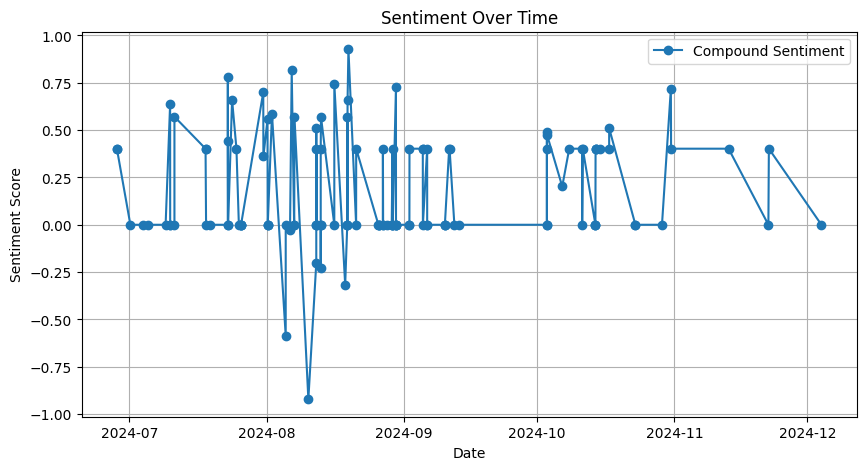

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['compound'], label='Compound Sentiment', marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid()
plt.show()


In [102]:
from textblob import TextBlob

# Sentiment Analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) to 1 (positive)

# Apply sentiment analysis
data['Sentiment_Polarity'] = data['Cleaned_Message'].apply(get_sentiment)

# Show the sentiment values
print(data[['Message', 'Sentiment_Polarity']].head())


                                             Message  Sentiment_Polarity
0  BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...                 0.0
1                                Nifty Up 300 Points                 0.0
2  BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...                 0.1
3  OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...                -0.1
4  OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...                -0.1


In [103]:
data.head()

,Message,Date,Cleaned_Message,compound,positive,neutral,negative,Sentiment_Polarity
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0000,0.000,1.000,0.0,0.0
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.4019,0.574,0.426,0.0,0.0
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.0000,0.000,1.000,0.0,0.1
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,0.4019,0.252,0.748,0.0,-0.1
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,0.4019,0.172,0.828,0.0,-0.1


In [104]:
data = data.drop(columns=['compound', 'positive', 'neutral', 'negative'])

In [105]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.0
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1
...,...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...,0.0


In [106]:
import re

# Function to extract Buy, Sell, and Stop levels
def extract_levels_v2(text):
    # Find all numbers in the text
    numbers = re.findall(r'\d+(?:\.\d+)?', text)
    buy_level, sell_level, stop_level = None, None, None

    # Identify whether the text is about "buy" or "sell"
    if "buy" in text.lower():
        buy_level = float(numbers[0]) if len(numbers) > 0 else None
        stop_level = float(numbers[1]) if len(numbers) > 1 else None
    elif "sell" in text.lower():
        sell_level = float(numbers[0]) if len(numbers) > 0 else None
        stop_level = float(numbers[1]) if len(numbers) > 1 else None

    return {"Buy_Level": buy_level, "Sell_Level": sell_level, "Stop_Level": stop_level}

# Apply the function to the "Message" column
data['Extracted_Levels'] = data['Message'].apply(extract_levels_v2)

# Create separate columns for Buy Level, Sell Level, and Stop Level
data['Buy_Level'] = data['Extracted_Levels'].apply(lambda x: x['Buy_Level'])
data['Sell_Level'] = data['Extracted_Levels'].apply(lambda x: x['Sell_Level'])
data['Stop_Level'] = data['Extracted_Levels'].apply(lambda x: x['Stop_Level'])

# Drop the intermediate column if desired
data.drop(columns=['Extracted_Levels'], inplace=True)

# Display the updated DataFrame
print(data.head())


                                             Message  \
0  BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...   
1                                Nifty Up 300 Points   
2  BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...   
3  OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...   
4  OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...   

                       Date  \
0 2024-12-04 03:47:59+00:00   
1 2024-11-22 07:09:53+00:00   
2 2024-11-22 04:34:44+00:00   
3 2024-11-13 04:59:06+00:00   
4 2024-10-31 05:35:44+00:00   

                                     Cleaned_Message  Sentiment_Polarity  \
0  buy banknifty  pe above  target  point sl expi...                 0.0   
1                                   nifty up  points                 0.0   
2                       buy sensex  ce near  target                  0.1   
3  option buying view positional pfc ce cmp  supp...                -0.1   
4  option buying view for next few days lupin ce ...                -0.1   

   Buy_Level  Sell_

In [107]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,NaN,4.704800e+05
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.0,NaN,NaN,NaN
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,NaN,4.905000e+05
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,NaN,2.000000e+01
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,NaN,1.051080e+05
...,...,...,...,...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,NaN,5.235280e+05
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,NaN,4.404500e+05
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,NaN,4.093410e+11
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...,0.0,270.0,NaN,1.300000e+01


In [109]:
# Create a 'Stock_Price_Trend' based on sentiment polarity
# Positive sentiment -> "up", negative sentiment -> "down", neutral -> "neutral"

def assign_stock_trend(sentiment):
    if sentiment > 0:
        return 'up'
    elif sentiment < 0:
        return 'down'
    else:
        return 'neutral'

# Apply this to the sentiment column
data['Stock_Price_Trend'] = data['Sentiment_Polarity'].apply(assign_stock_trend)

# Check the result
print(data[['Message', 'Sentiment_Polarity', 'Stock_Price_Trend']].head())


                                             Message  Sentiment_Polarity  \
0  BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...                 0.0   
1                                Nifty Up 300 Points                 0.0   
2  BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...                 0.1   
3  OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...                -0.1   
4  OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...                -0.1   

  Stock_Price_Trend  
0           neutral  
1           neutral  
2                up  
3              down  
4              down  


In [110]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,NaN,4.704800e+05,neutral
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.0,NaN,NaN,NaN,neutral
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,NaN,4.905000e+05,up
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,NaN,2.000000e+01,down
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,NaN,1.051080e+05,down
...,...,...,...,...,...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,NaN,5.235280e+05,neutral
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,NaN,4.404500e+05,neutral
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,NaN,4.093410e+11,neutral
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...,0.0,270.0,NaN,1.300000e+01,neutral


In [111]:
data.isnull().sum()

Message                 0
Date                    0
Cleaned_Message         0
Sentiment_Polarity      0
Buy_Level              53
Sell_Level            120
Stop_Level             50
Stock_Price_Trend       0
dtype: int64

In [112]:
import numpy as np

In [113]:
def calculate_sell_level(row, min_profit=0.15, max_profit=0.20):
    # Generate a random profit percentage between 15% and 20%
    profit_percentage = np.random.uniform(min_profit, max_profit)
    # Calculate the Sell Level
    sell_level = row['Buy_Level'] * (1 + profit_percentage)
    return sell_level

# Apply the function to fill missing Sell Level
data['Sell_Level'] = data.apply(lambda row: calculate_sell_level(row) if pd.isna(row['Sell_Level']) else row['Sell_Level'], axis=1)

# Show the updated data
print(data[['Buy_Level', 'Sell_Level']])

     Buy_Level     Sell_Level
0      52100.0   62011.891587
1          NaN            NaN
2      77500.0   89413.732948
3        450.0     519.360138
4        216.0     256.653459
..         ...            ...
120    12800.0   15095.674580
121    12800.0   15035.111496
122   408485.0  484659.898555
123      270.0     315.252966
124        NaN            NaN

[125 rows x 2 columns]


In [114]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,62011.891587,4.704800e+05,neutral
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.0,NaN,NaN,NaN,neutral
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,89413.732948,4.905000e+05,up
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,519.360138,2.000000e+01,down
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,256.653459,1.051080e+05,down
...,...,...,...,...,...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,15095.674580,5.235280e+05,neutral
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,15035.111496,4.404500e+05,neutral
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,484659.898555,4.093410e+11,neutral
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...,0.0,270.0,315.252966,1.300000e+01,neutral


In [115]:
def calculate_buy_level(row, min_discount=0.10, max_discount=0.15):

    discount_percentage = np.random.uniform(min_discount, max_discount)
    # Calculate the Buy Level (Sell Level * (1 - discount_percentage))
    buy_level = row['Sell_Level'] * (1 - discount_percentage)
    return buy_level

# Apply the function to fill missing Buy Level with 10%-15% discount from Sell Level
data['Buy_Level'] = data.apply(lambda row: calculate_buy_level(row) if pd.isna(row['Buy_Level']) else row['Buy_Level'], axis=1)

# Show the updated data with calculated Buy Levels and Sell Levels
print(data[['Buy_Level', 'Sell_Level']])

     Buy_Level     Sell_Level
0      52100.0   62011.891587
1          NaN            NaN
2      77500.0   89413.732948
3        450.0     519.360138
4        216.0     256.653459
..         ...            ...
120    12800.0   15095.674580
121    12800.0   15035.111496
122   408485.0  484659.898555
123      270.0     315.252966
124        NaN            NaN

[125 rows x 2 columns]


In [116]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,62011.891587,4.704800e+05,neutral
1,Nifty Up 300 Points,2024-11-22 07:09:53+00:00,nifty up points,0.0,NaN,NaN,NaN,neutral
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,89413.732948,4.905000e+05,up
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,519.360138,2.000000e+01,down
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,256.653459,1.051080e+05,down
...,...,...,...,...,...,...,...,...
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,15095.674580,5.235280e+05,neutral
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,15035.111496,4.404500e+05,neutral
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,484659.898555,4.093410e+11,neutral
123,OPTION BUYING VIEW RBL BANK 270CE CMP 13 SUPPO...,2024-06-28 04:14:45+00:00,option buying view rbl bank ce cmp support v...,0.0,270.0,315.252966,1.300000e+01,neutral


In [117]:
data.isnull().sum()

Message                0
Date                   0
Cleaned_Message        0
Sentiment_Polarity     0
Buy_Level             48
Sell_Level            48
Stop_Level            50
Stock_Price_Trend      0
dtype: int64

In [118]:
data.dropna()

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,62011.891587,4.704800e+05,neutral
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,89413.732948,4.905000e+05,up
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,519.360138,2.000000e+01,down
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,256.653459,1.051080e+05,down
6,BUY BANKNIFTY 51700 PE ABOVE 510 TARGET 257010...,2024-10-29 04:14:07+00:00,buy banknifty pe above target point sl expi...,0.0,51700.0,59822.410524,5.100000e+02,neutral
...,...,...,...,...,...,...,...,...
119,BUY MARUTI 12500 CE NEAR 260 TARGET 270290350,2024-07-09 04:05:30+00:00,buy maruti ce near target,0.1,12500.0,14401.691442,2.600000e+02,up
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,15095.674580,5.235280e+05,neutral
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,15035.111496,4.404500e+05,neutral
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,484659.898555,4.093410e+11,neutral


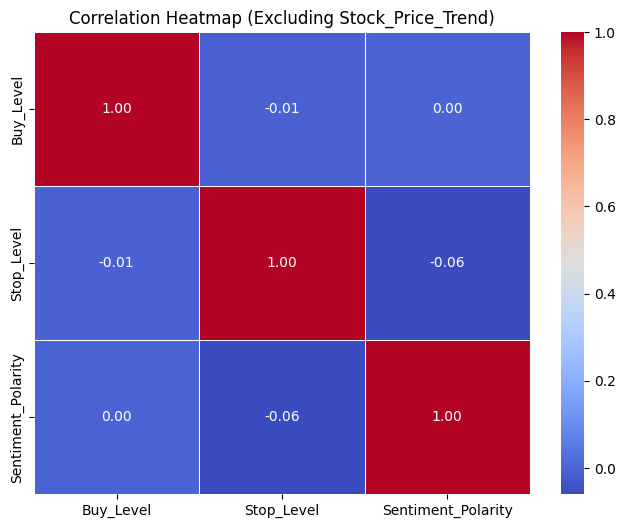

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'Stock_Price_Trend' since it's categorical
correlation_matrix = data[['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Stock_Price_Trend)')
plt.show()


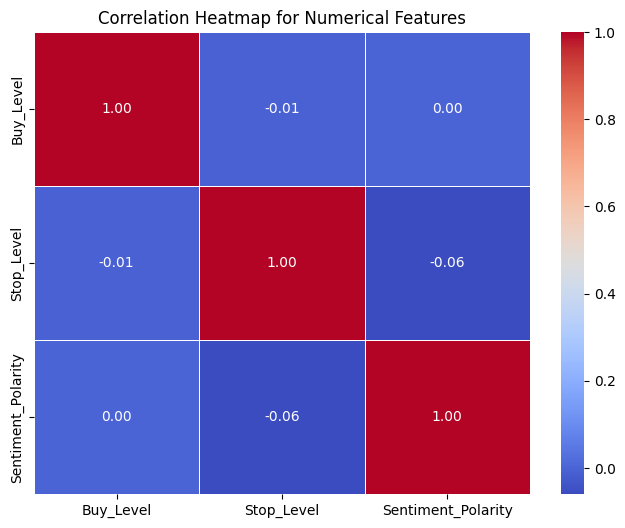

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = ['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


In [121]:
data.isnull().sum()

Message                0
Date                   0
Cleaned_Message        0
Sentiment_Polarity     0
Buy_Level             48
Sell_Level            48
Stop_Level            50
Stock_Price_Trend      0
dtype: int64

In [122]:
data.dropna(inplace=True)

In [123]:
data

,Message,Date,Cleaned_Message,Sentiment_Polarity,Buy_Level,Sell_Level,Stop_Level,Stock_Price_Trend
0,BUY BANKNIFTY 52100 PE ABOVE 470480 TARGET 307...,2024-12-04 03:47:59+00:00,buy banknifty pe above target point sl expi...,0.0,52100.0,62011.891587,4.704800e+05,neutral
2,BUY SENSEX 77500 CE NEAR 490500 TARGET 3070100...,2024-11-22 04:34:44+00:00,buy sensex ce near target,0.1,77500.0,89413.732948,4.905000e+05,up
3,OPTION BUYING VIEW POSITIONAL PFC 450CE CMP 20...,2024-11-13 04:59:06+00:00,option buying view positional pfc ce cmp supp...,-0.1,450.0,519.360138,2.000000e+01,down
4,OPTION BUYING VIEW FOR NEXT FEW DAYS LUPIN 216...,2024-10-31 05:35:44+00:00,option buying view for next few days lupin ce ...,-0.1,216.0,256.653459,1.051080e+05,down
6,BUY BANKNIFTY 51700 PE ABOVE 510 TARGET 257010...,2024-10-29 04:14:07+00:00,buy banknifty pe above target point sl expi...,0.0,51700.0,59822.410524,5.100000e+02,neutral
...,...,...,...,...,...,...,...,...
119,BUY MARUTI 12500 CE NEAR 260 TARGET 270290350,2024-07-09 04:05:30+00:00,buy maruti ce near target,0.1,12500.0,14401.691442,2.600000e+02,up
120,BUY DIXON 12800 PE ABOVE 523528 TARGET 5555806...,2024-07-05 05:26:46+00:00,buy dixon pe above target expiry july,0.0,12800.0,15095.674580,5.235280e+05,neutral
121,BUY DIXON 12800 PE ABOVE 440450 TARGET 4755005...,2024-07-04 04:04:15+00:00,buy dixon pe above target sl expiry july,0.0,12800.0,15035.111496,4.404500e+05,neutral
122,BUY HDFCAMC FUT ABOVE 408485 TARGET40934100415...,2024-07-01 05:17:47+00:00,buy hdfcamc fut above target expiry july,0.0,408485.0,484659.898555,4.093410e+11,neutral


# Building Models

In [125]:
# Features (input) for predicting Sell Level
X = data[['Buy_Level', 'Stop_Level', 'Sentiment_Polarity']]

# Target variable (Sell Level)
y = data['Sell_Level']


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [127]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [128]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)


In [129]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Mean Squared Error (MSE) for Linear Regression: {mse_lr:.2f}')

# Calculate R-squared (R²) score
r2_lr = r2_score(y_test, y_pred_lr) 
print(f'R-squared (R²) for Linear Regression: {r2_lr:.2f}')

Mean Squared Error (MSE) for Linear Regression: 826596918493.22
R-squared (R²) for Linear Regression: 1.00


In [130]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [131]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# R-squared score (how well the model explains the variance in the target variable)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 239320746655531.44
R-squared: 0.06


In [132]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 3148796.49221313
Mean Squared Error (MSE): 224807391742294.25
R-squared (R²): 0.11281715589978736
